In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

# Linear Regression

Hope you already have some intuition about how linear regression works :)

## Regularization techniques

1. Lasso Regression
2. Ridge Regression
3. Elastic Net Regression

In [2]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
X = iris['petal_length']
y = iris['petal_width']

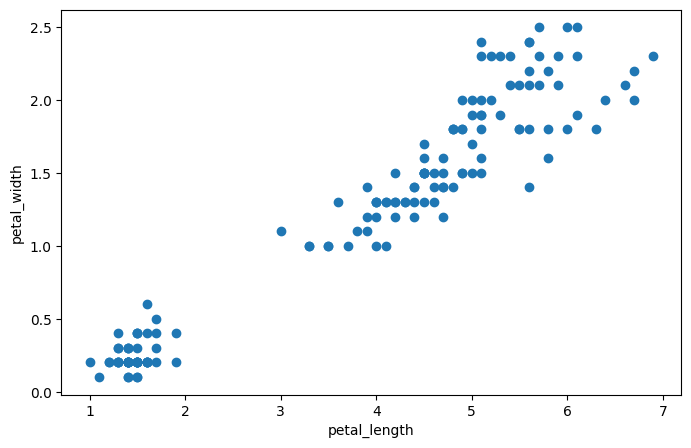

In [4]:
plt.figure(figsize=(8, 5))
plt.scatter(X, y)
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.show()

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [6]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create a LinearRegression instance
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train.values.reshape(-1, 1), y_train.values.reshape(-1, 1))

LinearRegression()

In [7]:
# Print the coefficients of the trained model
model.coef_

array([[0.42186798]])

Text(0, 0.5, 'petal_width')

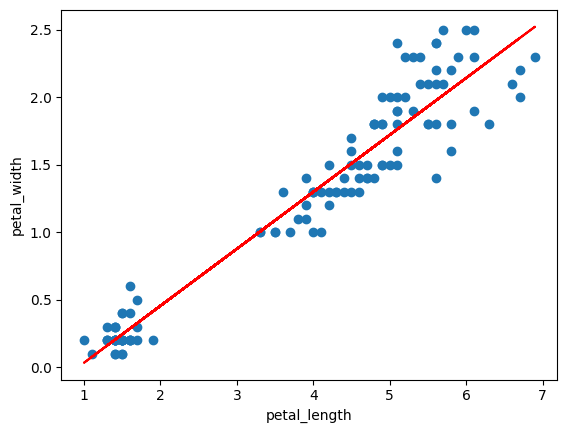

In [8]:
# Draw regression line
plt.scatter(X_train, y_train)
plt.plot(X_train, model.predict(X_train.values.reshape(-1, 1)), color='red')
plt.xlabel('petal_length')
plt.ylabel('petal_width')

In [9]:
# Make predictions on the testing set
y_pred = model.predict(X_test.values.reshape(-1, 1))

In [10]:
# Compare predictions to actual values
compare_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
compare_df

,Actual,Predicted
14,0.2,0.118091
98,1.1,0.877454
75,1.4,1.468069
16,0.4,0.160278
131,2.0,2.311805
56,1.6,1.594629
141,2.3,1.763376
44,0.4,0.413399
29,0.2,0.286838
120,2.3,2.016497


In [11]:
# Metrics on basic linear regression model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print(f'''Mean Squared Error:{mean_squared_error(y_test, y_pred)}
      \nMean Absolute Error:{mean_absolute_error(y_test, y_pred)}
      \nR2 Score:{r2_score(y_test, y_pred)}''')

Mean Squared Error:0.03494710322694023
      
Mean Absolute Error:0.12891492665301313
      
R2 Score:0.927934211107492


In [22]:
# Now let's try Lasso regression
from sklearn.linear_model import Lasso

# Create Lasso instance
lasso = Lasso(alpha=0.1)

# Fit the model to the training data
lasso.fit(X_train.values.reshape(-1, 1), y_train.values.reshape(-1, 1))

# Print the coefficients of the trained lasso model
lasso.coef_

array([0.38975563])

In [23]:
y_pred_lasso = lasso.predict(X_test.values.reshape(-1, 1))

In [24]:
# Metrics on Lasso regression model
print(f'''Mean Squared Error:{mean_squared_error(y_test, y_pred_lasso)}
      \nMean Absolute Error:{mean_absolute_error(y_test, y_pred_lasso)}
      \nR2 Score:{r2_score(y_test, y_pred_lasso)}''')

Mean Squared Error:0.03196531365429025
      
Mean Absolute Error:0.11804731041225125
      
R2 Score:0.9340830760497176


# Logistic Regression

Links that might be useful:
- https://www.analyticsvidhya.com/blog/2021/08/conceptual-understanding-of-logistic-regression-for-data-science-beginners/
- https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc
- https://www.datacamp.com/tutorial/understanding-logistic-regression-python
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

## Linear vs Logistic Regression
<img src="img\lin_reg_log_reg.png" width=800 height=400>

Image source: [datacamp.com](https://www.datacamp.com/tutorial/understanding-logistic-regression-python)

## Sigmoid function
$$f(x) = \frac{1}{1 + e^{-x}}$$
<img src="img/sigmoid.png" width=800 height=500>

Image source: [codeacademy.com](https://www.codecademy.com/resources/docs/ai/neural-networks/sigmoid-activation-function)

In [25]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [26]:
X = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'class', 'who']]
y = df['survived']

In [27]:
X = pd.get_dummies(X, drop_first=True, dtype=float)
X = X.fillna(method='ffill')
X

,pclass,age,sibsp,parch,fare,sex_male,class_Second,class_Third,who_man,who_woman
0,3,22.0,1,0,7.2500,1.0,0.0,1.0,1.0,0.0
1,1,38.0,1,0,71.2833,0.0,0.0,0.0,0.0,1.0
2,3,26.0,0,0,7.9250,0.0,0.0,1.0,0.0,1.0
3,1,35.0,1,0,53.1000,0.0,0.0,0.0,0.0,1.0
4,3,35.0,0,0,8.0500,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1.0,1.0,0.0,1.0,0.0
887,1,19.0,0,0,30.0000,0.0,0.0,0.0,0.0,1.0
888,3,19.0,1,2,23.4500,0.0,0.0,1.0,0.0,1.0
889,1,26.0,0,0,30.0000,1.0,0.0,0.0,1.0,0.0


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [31]:
from sklearn.linear_model import LogisticRegression

# Create a LogisticRegression instance
log_reg = LogisticRegression()

# # Fit the model to the training data
log_reg.fit(X_train, y_train)

log_reg.coef_

array([[-0.42615831, -0.00748052, -0.52426332, -0.17573125,  0.00388727,
        -0.02282845, -0.43547707, -1.16042357, -3.2360876 ,  0.02532312]])

In [30]:
# Make predictions on the testing set
y_pred = log_reg.predict(X_test)

# # Compare predictions to actual values
compare_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
compare_df

,Actual,Predicted
862,1,1
223,0,0
84,1,1
680,0,1
535,1,1
...,...,...
796,1,1
815,0,0
629,0,0
421,0,0


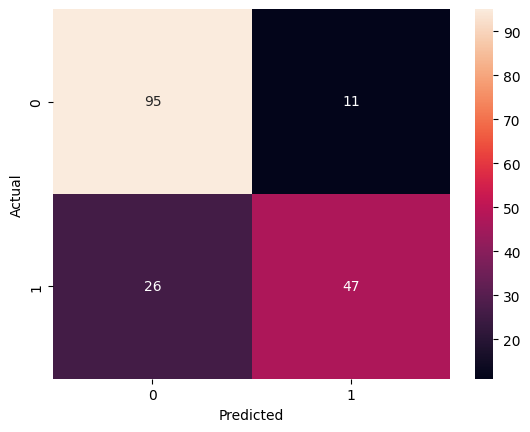

In [33]:
# Metrics on logistic regression model
from sklearn.metrics import confusion_matrix, classification_report

# # Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [34]:
# Metrics on logistic regression model
print(f'Classification Report:\n{classification_report(y_test, y_pred)}')

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       106
           1       0.81      0.64      0.72        73

    accuracy                           0.79       179
   macro avg       0.80      0.77      0.78       179
weighted avg       0.80      0.79      0.79       179



In [23]:
# Task: Try to improve the logistic regression model by transforming/scaling the data, 
#       changing hyperparameters, or using more features.
#       Compare the results to the basic logistic regression model.
# ...

# Decision Tree and Random Forest

In [24]:
# ...